## RNN (Recurrent Neural Network) 알아보기
- RNN은 시퀀스 데(텍스트, 시계열 데이터, 음성 신호 등 순서가 중요한 데이터)이터를 처리하기 위해 설계된 신경망의 한 유형
- RNN은 이전 시간 단계의 정보를 현재 시간 단계의 입력과 결합하여 패턴을 인식하는 것임
- <img src='rnn_model.png'><img src='rnn_model1.png'>다.

#### RNN의 특징:
1. **메모리**: RNN은 이전의 정보를 기억할 수 있으며, 이 정보는 현재 입력의 처리에 사용됩니다.
2. **시간단계**: RNN은 시간 단계를 통해 데이터를 처리합니다. 각 시간 단계에서 RNN은 이전 시간 단계의 상태와 현재 시간 단계의 입력을 사용하여 출력을 생성합니다.

#### 입력 형태
RNN 레이어의 `input_shape` 매개변수는 입력 데이터의 형태를 정의하며 이는 `(timesteps, features)` 형태의 튜플로 지정됩니다.

- `timesteps`: 시퀀스의 길이, 즉 시간 단계의 수
- `features`: 각 시간 단계에서의 특성의 수

`return_sequences` 매개변수는 RNN 레이어가 모든 시간 단계의 출력을 반환할지, 아니면 마지막 시간 단계의 출력만 반환할지를 결정합니다. 첫 번째 `SimpleRNN` 레이어에서는 `return_sequences=모델을 구축할 수 있으며, 입력 형태와 모델 구조를 쉽게 조정할 수 있습니다.

In [ ]:
# !pip install tensorflow

In [1]:
import tensorflow as tf

model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(2, 10)),  # 입력 형태는 (timesteps, features) timesteps는 현재 층의 정보를 몇 단계 후의 층까지 전달할지를 정한다
        tf.keras.layers.SimpleRNN(3, return_sequences=True), # 각 층에서의 출력값을 나타낸다.
        tf.keras.layers.SimpleRNN(3),  # loss ='mse'
    ]
)

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Input(shape=(2, 10)))
# model.add(tf.keras.layers.SimpleRNN(3, return_sequences=True))
# model.add(tf.keras.layers.SimpleRNN(3))

model.summary()

/Users/hong/venvs/nlp_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 2, 3)           │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63 (252.00 B)

 Trainable params: 63 (252.00 B)

 Non-trainable params: 0 (0.00 B)

## 1.RNN을  이용하여  텍스트  생성하기

### 1) 데이터 로드 및  전처리

In [2]:
# 1. 필요한 라이브러리 임포트
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# 2. 학습용 텍스트 데이터 정의
text = """경마장에  있는  말이  뛰고  있다\n
        그의  말이  법이다\n
        가는  말이  고와야  오는  말이  곱다\n
        """

In [4]:
# 3. 토크나이저 초기화 및 학습
tokenizer = Tokenizer()  # ... code here

# 텍스트로부터 단어 사전 구축
tokenizer.fit_on_texts(text)  # ... code here

# 4. 어휘 사전 크기 계산 (패딩용 0번 인덱스 포함)
vocab_size = len(tokenizer.word_index)+1  # ... code here
print('단어 집합의  크기  : %d' % vocab_size)

단어 집합의  크기  : 20


Keras의 Embedding : 입력 정수 인덱스를 [0, input_dim-1] 범위로 가정
- Tokenizer는 단어 인덱스를 1부터 부여
- 가장 큰 인덱스 = len(word_index)
- 따라서 input_dim은 최대 인덱스 + 1이어야 안전합니다.
- +1은 0번 인덱스를 패딩(padding) 용도로 남겨두기 위함

In [5]:
dir(tokenizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 'analyzer',
 'char_level',
 'document_count',
 'filters',
 'fit_on_sequences',
 'fit_on_texts',
 'get_config',
 'index_docs',
 'index_word',
 'lower',
 'num_words',
 'oov_token',
 'sequences_to_matrix',
 'sequences_to_texts',
 'sequences_to_texts_generator',
 'split',
 'texts_to_matrix',
 'texts_to_sequences',
 'texts_to_sequences_generator',
 'to_json',
 'word_counts',
 'word_docs',
 'word_index']

In [6]:
print(tokenizer.word_index) # 각  단어와  단어에  부여된  정수  인덱스  출력- 빈도수 순으로 출력
print(tokenizer.word_counts)

{'이': 1, '말': 2, '는': 3, '다': 4, '있': 5, '고': 6, '경': 7, '마': 8, '장': 9, '에': 10, '뛰': 11, '그': 12, '의': 13, '법': 14, '가': 15, '와': 16, '야': 17, '오': 18, '곱': 19}
OrderedDict([('경', 1), ('마', 1), ('장', 1), ('에', 1), ('있', 2), ('는', 3), ('말', 4), ('이', 5), ('뛰', 1), ('고', 2), ('다', 3), ('그', 1), ('의', 1), ('법', 1), ('가', 1), ('와', 1), ('야', 1), ('오', 1), ('곱', 1)])


In [ ]:
# 5. 학습 시퀀스 생성을 위한 빈 리스트 초기화
sequences = list()

# 6. 각 문장별로 시퀀스 데이터 생성
for line in text.split('\n'):  # 줄바꿈을 기준으로 문장 분리
    if not line.strip():   # 공백/빈줄이면 스킵
        continue
    print(line)

    # 7. 문장을 정수 시퀀스로 변환
    encoded = tokenizer.texts_  # ... code here
    print(encoded)

    # 8. 다음 단어 예측용 학습 샘플 생성 (슬라이딩 윈도우 방식)
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]  # 처음부터 i+1번째까지의 부분 시퀀스
        print(sequence)
        sequences.append(sequence)

print('학습에  사용한  샘플의  개수: %d' % len(sequences))

경마장에  있는  말이  뛰고  있다
[2, 3, 1, 4, 5]
[2, 3]
[2, 3, 1]
[2, 3, 1, 4]
[2, 3, 1, 4, 5]
        그의  말이  법이다
[6, 1, 7]
[6, 1]
[6, 1, 7]
        가는  말이  고와야  오는  말이  곱다
[8, 1, 9, 10, 1, 11]
[8, 1]
[8, 1, 9]
[8, 1, 9, 10]
[8, 1, 9, 10, 1]
[8, 1, 9, 10, 1, 11]
학습에  사용한  샘플의  개수: 11


In [8]:
print(sequences) # 전체  샘플을  출력

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [9]:
# 9. 최대 시퀀스 길이 계산
max_len = max(len(l) for l in sequences)
print('샘플의  최대  길이  : {}'.format(max_len))

샘플의  최대  길이  : 6


#### > pad_sequences
`pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0) `   
문장의 길이를 maxlen 인자로 맞추어 준다. 120으로 지정했다면 120보다 짧은 문장은 0으로 채워서 120단어로 맞춰주고 120보다 긴 문장은 120단어까지만 잘라낸다.    
    
- (num_samples, num_timesteps)으로 2차원의 numpy 배열로 만들어준다. maxlen을 120으로 지정하였다면, num_timesteps도 120이 된다.  
- 인수
    - padding : 'pre' or 'post'
    - truncating : 'pre' or 'post'
    - value : 채워질 값. default는 0


In [10]:
# 10. 모든 시퀀스를 동일한 길이로 패딩 (앞쪽에 0 추가)
sequences = ...  # ... code here
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [11]:
# 11. NumPy 배열로 변환
sequences = np.array(sequences)

# 12. 입력(X)과 정답(y) 데이터 분리
X = ...  # ... code here  # 마지막 단어를 제외한 모든 단어들 (입력)
y = ...  # ... code here   # 마지막 단어만 (정답 라벨)
print("입력 데이터 X:")
print(X)
print("정답 데이터 y:")
print(y)

입력 데이터 X:
[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]
정답 데이터 y:
[ 3  1  4  5  1  7  1  9 10  1 11]


In [12]:
# 13. 정답 데이터를 원-핫 인코딩으로 변환
y = ...  # ... code here
print("원-핫 인코딩된 y:")
print(y)

원-핫 인코딩된 y:
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### 2) 모델  설계하기

In [13]:
# 14. 필요한 모델 라이브러리 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#### > Embedding
`tf.keras.layers.Embedding( input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None, **kwargs)`

- 인수
    - input_dim : 입력 크기
    - output_dim : 출력 크기
    - input_length : 입력 데이터의 길이

단어를 밀집벡터로 만드는 일을 수행한다. 정수 인코딩이 된 단어들을 입력으로 받아 수행한다. => 단어를 실수 벡터로 변환. 학습하면서 비슷한 단어는 비슷한 위치(벡터 값)를 갖게 됨
- SimpleRNN 오류발생하면 numpy 버전을 낮춤( pip install -U numpy==1.19.5)


In [14]:
# 15. RNN 기반 텍스트 생성 모델 정의 -
model = Sequential()
...  # ... code here  # 임베딩층: 각 단어를 6차원 벡터로 변환 (input_length 제거)
...  # ... code here # 30% 드롭아웃 추가 (과적합 방지)
...  # ... code here  # RNN층: 8개의 은닉 유닛
...  # ... code here  # 출력층: 각 단어의 확률 분포 계산

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# 16. 모델 컴파일 (손실함수, 옵티마이저, 평가지표 설정)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 17. 모델 학습 (200 에포크)
history = model.fit(X, y, epochs=200, verbose=2)

# 조기 종료 설정 (검증 손실이 5 에포크 동안 개선되지 않으면 중단)
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # 더 적은 에포크로 학습
# history = model.fit(X, y, epochs=50, verbose=1, validation_split=0.2,
#                           callbacks=[early_stopping])


Epoch 1/200
1/1 - 2s - 2s/step - accuracy: 0.0000e+00 - loss: 2.4974
Epoch 2/200
1/1 - 0s - 100ms/step - accuracy: 0.0909 - loss: 2.4740
Epoch 3/200
1/1 - 0s - 75ms/step - accuracy: 0.0909 - loss: 2.4909
Epoch 4/200
1/1 - 0s - 134ms/step - accuracy: 0.2727 - loss: 2.4778
Epoch 5/200
1/1 - 0s - 145ms/step - accuracy: 0.2727 - loss: 2.4772
Epoch 6/200
1/1 - 0s - 80ms/step - accuracy: 0.0909 - loss: 2.4697
Epoch 7/200
1/1 - 0s - 137ms/step - accuracy: 0.0000e+00 - loss: 2.4844
Epoch 8/200
1/1 - 0s - 68ms/step - accuracy: 0.1818 - loss: 2.4707
Epoch 9/200
1/1 - 0s - 141ms/step - accuracy: 0.1818 - loss: 2.4674
Epoch 10/200
1/1 - 0s - 140ms/step - accuracy: 0.1818 - loss: 2.4761
Epoch 11/200
1/1 - 0s - 91ms/step - accuracy: 0.1818 - loss: 2.4602
Epoch 12/200
1/1 - 0s - 126ms/step - accuracy: 0.1818 - loss: 2.4600
Epoch 13/200
1/1 - 0s - 136ms/step - accuracy: 0.0909 - loss: 2.4531
Epoch 14/200
1/1 - 0s - 143ms/step - accuracy: 0.2727 - loss: 2.4527
Epoch 15/200
1/1 - 0s - 72ms/step - accura

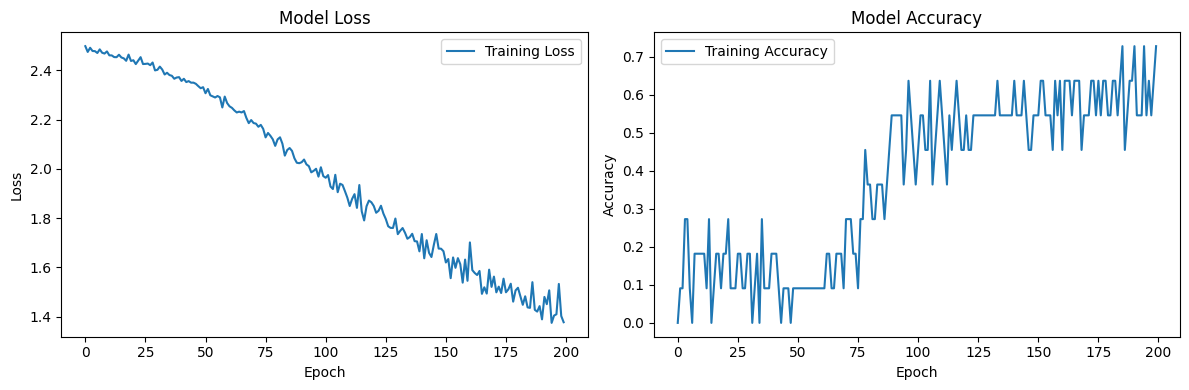


=== 최종 모델 성능 ===
Training Loss: 1.3780
Training Accuracy: 0.7273


In [19]:
# 18. 학습 과정 시각화
plt.figure(figsize=(12, 4))

# 19. 손실값 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 20. 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 21. 최종 모델 성능 출력
final_loss = history.history['loss'][-1]
final_accuracy = history.history['accuracy'][-1]
# final_val_loss = history.history['val_loss'][-1]
# final_val_accuracy = history.history['val_accuracy'][-1]

print(f"\n=== 최종 모델 성능 ===")
print(f"Training Loss: {final_loss:.4f}")
print(f"Training Accuracy: {final_accuracy:.4f}")
# print(f"Validation Loss: {final_val_loss:.4f}")
# print(f"Validation Accuracy: {final_val_accuracy:.4f}")


In [20]:
# 22. 텍스트 생성 함수 정의
def sentence_generation(model, tokenizer, current_word, n):
    """
    주어진 시작 단어로부터 n개의 단어를 예측하여 문장 생성
    """
    init_word = current_word  # 초기 단어 저장
    sentence = ''

    # 23. n번 반복하여 다음 단어 예측
    for _ in range(n):
        # 24. 현재 단어를 정수 인덱스로 변환
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        print("encoded => ", encoded)

        # 25. 모델 입력 형태에 맞게 패딩
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 26. 다음 단어 확률 예측
        result = model.predict(encoded, verbose=0)

        # 27. 가장 높은 확률의 단어 인덱스 선택
        result = np.argmax(result, axis=-1)
        print("result => ", result)

        # 28. 인덱스를 단어로 변환
        for word, index in tokenizer.word_index.items():
            if index == result:
                break

        # 29. 현재 단어 업데이트 및 문장에 추가
        current_word = current_word + ' '  + word
        sentence = sentence + ' ' + word

    # 30. 초기 단어와 생성된 문장 결합
    sentence = init_word + sentence
    return sentence

# 31. 다양한 시작 단어로 텍스트 생성 테스트
print(f"\n=== 텍스트 생성 평가 ===")
test_words = ['경마장에', '그의', '가는']
for start_word in test_words:
    if start_word in tokenizer.word_index:
        generated = sentence_generation(model, tokenizer, start_word, 4)
        print(f"시작 단어 '{start_word}': {generated}")
    else:
        print(f"시작 단어 '{start_word}'는 어휘 사전에 없습니다.")


=== 텍스트 생성 평가 ===
encoded =>  [2]
result =>  [1]
encoded =>  [2, 1]
result =>  [1]
encoded =>  [2, 1, 1]
result =>  [1]
encoded =>  [2, 1, 1, 1]
result =>  [5]
시작 단어 '경마장에': 경마장에 말이 말이 말이 있다
encoded =>  [6]
result =>  [1]
encoded =>  [6, 1]
result =>  [1]
encoded =>  [6, 1, 1]
result =>  [1]
encoded =>  [6, 1, 1, 1]
result =>  [1]
시작 단어 '그의': 그의 말이 말이 말이 말이
encoded =>  [8]
result =>  [1]
encoded =>  [8, 1]
result =>  [1]
encoded =>  [8, 1, 1]
result =>  [1]
encoded =>  [8, 1, 1, 1]
result =>  [1]
시작 단어 '가는': 가는 말이 말이 말이 말이


In [21]:
print(sentence_generation(model, tokenizer, '그의', 2)) # 2번 예측

encoded =>  [6]
result =>  [1]
encoded =>  [6, 1]
result =>  [1]
그의 말이 말이


In [22]:
print(sentence_generation(model, tokenizer, '가는', 5)) # 5번 예측

encoded =>  [8]
result =>  [1]
encoded =>  [8, 1]
result =>  [1]
encoded =>  [8, 1, 1]
result =>  [1]
encoded =>  [8, 1, 1, 1]
result =>  [1]
encoded =>  [8, 1, 1, 1, 1]
result =>  [11]
가는 말이 말이 말이 말이 곱다


## 2.LSTM을  이용하여  텍스트  생성하기
- 뉴스 헤드라인 코퍼스로 다음 단어 예측 LSTM 언어모델을 학습하고, 시작 단어를 주면 이어서 단어를 생성

### 1) 데이터 로드 및  전처리
•    파일  다운로드  링크  : https://www.kaggle.com/aashita/nyt-comments •    


In [24]:
# 1. 라이브러리 임포트
import pandas as pd
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical

In [26]:
!gdown 1J9m8J8r6PBncakj03cOGodfmza5Obmgu

Downloading...
From: https://drive.google.com/uc?id=1J9m8J8r6PBncakj03cOGodfmza5Obmgu
To: /content/ArticlesApril2018.csv
100% 693k/693k [00:00<00:00, 123MB/s]


In [27]:
# 2. 데이터 로드 및 헤드라인 추출
#    - CSV 파일에서 headline 컬럼만 리스트로 수집
#    - "Unknown" 항목 제거
df = pd.read_csv('ArticlesApril2018.csv') # 데이터  로드
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [29]:
print('열의  개수: ',len(df.columns))
print(df.columns)

열의  개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [30]:
df['headline'].isnull().values.any() #null이 하나도 없으면 false

np.False_

In [31]:
headline = [] # 리스트  선언
headline.extend(list(df.headline.values)) # 헤드라인의  값들을  리스트로  저장
headline[:5] # 상위  5개만  출력

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [32]:
print('총  샘플의  개수  : {}'.format(len(headline))) # 현재  샘플의  개수

총  샘플의  개수  : 1324


In [33]:
headline = [n for n in headline if n != "Unknown"] # Unknown(잡음) 값을  가진  샘플  제거
print('노이즈값  제거  후  샘플의  개수  : {}'.format(len(headline))) # 제거  후  샘플의  개수

노이즈값  제거  후  샘플의  개수  : 1214


In [34]:
headline[:5] # 5개의  샘플  출력  확인

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

In [35]:
# 3. 텍스트 전처리 함수 정의
#    - 비ASCII 문자 제거 (인코딩/디코딩)
#    - 구두점 제거 + 소문자화
def preprocessing(s):
    s=s.encode("utf8").decode("ascii",'ignore')  # from string import punctuation 사용
    return ''.join(c for c in s if c not in punctuation).lower() # 구두점  제거와  동시에  소문자화

# 4. 전처리 적용
text = [preprocessing(x) for x in headline]
text[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [36]:
# 5. 토크나이저 학습 및 단어집합 크기 계산
#    - word_index는 1부터 시작 → Embedding input_dim을 위해 +1

#토크나이저 초기화 및 학습
tokenizer = ...  # ... code here

# 텍스트로부터 단어 사전 구축
...  # ... code here

# 어휘 사전 크기 계산 (패딩용 0번 인덱스 포함)
vocab_size = ...  # ... code here
print('단어 집합의  크기  : %d' % vocab_size)

단어  집합의  크기  : 3494


In [37]:
# 6. n-gram 학습 시퀀스 생성
#    - 각 문장에 대해 [w1, w2], [w1, w2, w3], ... 식 부분 시퀀스 누적

sequences = list()

for line in text:
    encoded = ...  # ... code here # 각  샘플에  대한  정수  인코딩
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11] # 11개의  샘플  출력

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [38]:
len(sequences)

7803

In [39]:
index_to_word={}
for key, value in tokenizer.word_index.items(): # 인덱스를  단어로  바꾸기  위해  index_to_word를  생성
    index_to_word[value] = key

print('빈도수  상위  582번  단어  : {}'.format(index_to_word[582]))

빈도수  상위  582번  단어  : offer


In [40]:
# 7-1. 최대 길이 계산
max_len=max(len(l) for l in sequences) # 가장  긴  샘플의  길이  확인
print('샘플의  최대  길이  : {}'.format(max_len))

샘플의  최대  길이  : 24


In [41]:
# 7-2. 패딩
#    - pre-padding으로 앞쪽을 0으로 채움
# 가장  긴  샘플의  길이인  24로  모든  샘플의  길이를  패딩
sequences = ...  # ... code here
print(sequences[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [42]:
# 8. 입력(X) / 정답(y) 분리
#    - 마지막 토큰을 레이블(y), 나머지를 입력(X)
sequences = ...  # ... code here   # sequences를 numpy 배열로 변경하기

X = ...  # ... code here # 학습 데이터
y = ...  # ... code here  # 정답 데이터
print(X[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]


In [43]:
print(y[:3]) # 레이블  3개  출력

[ 269  371 1115]


In [44]:
# 9. 정답 one-hot 인코딩
y = ...  # ... code here # 레이블  데이터  y에  대해서  원-핪  인코딩  수행
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 2) 모델  설계하기

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [46]:
# 10. 모델 구성 (Embedding → LSTM → Dense)
#     - Embedding: 단어 인덱스 → 밀집 벡터(10차원)
#     - LSTM: 문맥 순서 학습
#     - Dense-softmax: 다음 단어 확률 분포

model = Sequential()
# y데이터를  분리하였으므로  이제  X데이터의  길이는  기존  데이터의  길이  - 1
model.add(...) # ... code here # 10: 계산된 결과를 몇개까지 만들것인다
model.add(...)  # ... code here
model.add(...)  # ... code here

# 11. 컴파일 및 학습
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=100, verbose=2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
244/244 - 11s - 43ms/step - accuracy: 0.0260 - loss: 7.6278
Epoch 2/100
244/244 - 11s - 45ms/step - accuracy: 0.0319 - loss: 7.1110
Epoch 3/100
244/244 - 9s - 35ms/step - accuracy: 0.0311 - loss: 6.9837
Epoch 4/100
244/244 - 11s - 43ms/step - accuracy: 0.0417 - loss: 6.8648
Epoch 5/100
244/244 - 11s - 45ms/step - accuracy: 0.0445 - loss: 6.7106
Epoch 6/100
244/244 - 9s - 37ms/step - accuracy: 0.0482 - loss: 6.5304
Epoch 7/100
244/244 - 11s - 44ms/step - accuracy: 0.0479 - loss: 6.3435
Epoch 8/100
244/244 - 9s - 37ms/step - accuracy: 0.0538 - loss: 6.1473
Epoch 9/100
244/244 - 8s - 34ms/step - accuracy: 0.0582 - loss: 5.9511
Epoch 10/100
244/244 - 10s - 40ms/step - accuracy: 0.0628 - loss: 5.7666
Epoch 11/100
244/244 - 11s - 46ms/step - accuracy: 0.0710 - loss: 5.5939
Epoch 12/100
244/244 - 10s - 42ms/step - accuracy: 0.0741 - loss: 5.4344
Epoch 13/100
244/244 - 10s - 43ms/step - accuracy: 0.0793 - loss: 5.2814
Epoch 14/100
244/244 - 9s - 36ms/step - accuracy: 0.0860 - loss:

In [50]:
# 12. 문장 생성 함수 정의
#     - 시작 단어(current_word)를 받아 n번 반복 예측
#     - 매 스텝마다 토큰화 → 패딩 → 모델 예측 → argmax로 다음 단어 선택
import numpy as np

def sentence_generation(model, tokenizer, current_word, n):
    init_word = current_word  # 처음 들어온 단어도 마지막에 같이 출력하기 위해 저장
    sentence = ''

    for _ in range(n):  # n번 반복
        # 현재 단어에 대한 정수 인코딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        print(f"현재 단어: '{current_word}' → 인코딩: {encoded}")

        # 데이터에 대한 패딩 (max_len-1 사용)
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')
        print(f"패딩 후: {encoded}")

        # predict_classes() → predict() + argmax()로 변경
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=-1)[0]  # 가장 높은 확률의 인덱스 선택
        print(f"예측 결과 인덱스: {result}")

        # 인덱스를 단어로 변환
        predicted_word = None
        for word, index in tokenizer.word_index.items():
            if index == result:  # 만약 예측한 단어의 인덱스와 동일한 단어가 있다면
                predicted_word = word
                break  # 해당 단어가 예측 단어이므로 break

        if predicted_word is None:
            print(f"인덱스 {result}에 해당하는 단어를 찾을 수 없습니다.")
            break

        print(f"예측된 단어: '{predicted_word}'")

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' ' + predicted_word
        sentence = sentence + ' ' + predicted_word  # 예측 단어를 문장에 저장

        print(f"누적 문장: '{sentence.strip()}'")
        print("-" * 50)

    sentence = init_word + sentence
    return sentence

# 어휘 사전에 있는 단어들 확인
print("=== 어휘 사전의 단어들 ===")
available_words = list(tokenizer.word_index.keys())
print(f"사용 가능한 단어들: {available_words}")

# 한국어 데이터에 맞는 시작 단어로 테스트
print(f"\n=== 텍스트 생성 테스트 ===")

=== 어휘 사전의 단어들 ===
사용 가능한 단어들: ['the', 'a', 'to', 'of', 'in', 'for', 'and', 'is', 'on', 'with', 'trump', 'as', 'at', 'new', 'how', 'from', 'it', 'an', 'that', 'be', 'season', 'us', 'you', 'its', 'what', 'episode', 'can', 'your', 'not', 'he', 'now', 'his', 'are', 'teaching', 'war', 'out', 'no', 'was', 'by', 'trumps', 'has', 'over', 'may', 'into', 'why', 'more', 'we', 'who', 'about', 'recap', 'activities', '1', 'just', 'do', 'women', 'when', 'syria', 'trade', 'i', '2', 'or', 'will', 'this', 'have', 'president', 'but', 'home', 'up', 'long', 'one', 'off', 'facebook', 'house', 'gop', 'our', 'case', 'they', 'life', 'end', 'right', 'some', 'big', 'dead', 'power', 'say', 'white', 'after', 'still', 'north', 'my', 'dont', 'need', 'race', 'own', 'against', 'here', 'should', 'border', 'former', 'epa', 'battle', 'mr', 'too', 'their', 'plan', '3', 'china', 'real', 'were', 'her', 'russia', 'art', 'good', 'then', 'like', 'pay', 'back', 'get', 'love', 'says', 'officials', 'fight', 'tariffs', 'pruitt', 

In [47]:
# 12. 문장 생성 함수 정의
#     - 시작 단어(current_word)를 받아 n번 반복 예측
#     - 매 스텝마다 토큰화 → 패딩 → 모델 예측 → argmax로 다음 단어 선택

def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재  단어, 반복핛  횟수
    init_word = current_word # 처음  들어온  단어도  마지막에  같이  출력하기위해  저장
    sentence = ''
    for _ in range(n): # n번  반복
        encoded = tokenizer.texts_to_sequences([current_word])[0] # 현재  단어에  대핚  정수  인코딩
        encoded = pad_sequences([encoded], maxlen=23, padding='pre') # 데이터에  대한  패딩
        result = model.predict_classes(encoded, verbose=0)
        for word, index in tokenizer.word_index.items():
            if index == result: # 만약 예측한  단어와  인덱스와  동일한  단어가  있다면
                break # 해당  단어가  예측  단어이므로  break
        current_word = current_word + ' '  + word # 현재  단어  + ' ' + 예측  단어를  현재  단어로  변경
        sentence = sentence + ' ' + word # 예측  단어를  문장에  저장

    sentence = init_word + sentence
    return sentence

In [51]:
# 13. 예시 문장 생성 - 어휘 사전에 있는 단어로 테스트
test_words = ['경마장에', '그의', '가는', '말이']
for start_word in test_words:
    if start_word in tokenizer.word_index:
        print(f"\n시작 단어: '{start_word}'")
        generated = sentence_generation(model, tokenizer, start_word, 3)
        print(f"최종 결과: {generated}")
        print("=" * 60)
    else:
        print(f"'{start_word}'는 어휘 사전에 없습니다.")

'경마장에'는 어휘 사전에 없습니다.
'그의'는 어휘 사전에 없습니다.
'가는'는 어휘 사전에 없습니다.
'말이'는 어휘 사전에 없습니다.


In [52]:
# 영어 단어 'i' 테스트 (어휘에 없을 가능성 높음)
print(f"\n영어 단어 'i' 테스트:")
if 'i' in tokenizer.word_index:
    print("'i'가 어휘 사전에 있습니다.")
    generated = sentence_generation(model, tokenizer, 'i', 3)
    print(f"결과: {generated}")
else:
    print("'i'는 어휘 사전에 없습니다. 한국어 단어를 사용해주세요.")


영어 단어 'i' 테스트:
'i'가 어휘 사전에 있습니다.
현재 단어: 'i' → 인코딩: [59]
패딩 후: [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 59]]
예측 결과 인덱스: 1856
예측된 단어: 'disapprove'
누적 문장: 'disapprove'
--------------------------------------------------
현재 단어: 'i disapprove' → 인코딩: [59, 1856]
패딩 후: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   59 1856]]
예측 결과 인덱스: 4
예측된 단어: 'of'
누적 문장: 'disapprove of'
--------------------------------------------------
현재 단어: 'i disapprove of' → 인코딩: [59, 1856, 4]
패딩 후: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   59 1856    4]]
예측 결과 인덱스: 167
예측된 단어: 'school'
누적 문장: 'disapprove of school'
--------------------------------------------------
결과: i disapprove of school


In [56]:
# 간단 체크
print("어휘 사전:", list(tokenizer.word_index.keys()))
print("첫 번째 단어:", list(tokenizer.word_index.keys())[0])

# 첫 번째 단어로 테스트
first_word = list(tokenizer.word_index.keys())[0]
result = simple_sentence_generation(model, tokenizer, first_word, 2)
print(f"결과: {result}")

어휘 사전: ['the', 'a', 'to', 'of', 'in', 'for', 'and', 'is', 'on', 'with', 'trump', 'as', 'at', 'new', 'how', 'from', 'it', 'an', 'that', 'be', 'season', 'us', 'you', 'its', 'what', 'episode', 'can', 'your', 'not', 'he', 'now', 'his', 'are', 'teaching', 'war', 'out', 'no', 'was', 'by', 'trumps', 'has', 'over', 'may', 'into', 'why', 'more', 'we', 'who', 'about', 'recap', 'activities', '1', 'just', 'do', 'women', 'when', 'syria', 'trade', 'i', '2', 'or', 'will', 'this', 'have', 'president', 'but', 'home', 'up', 'long', 'one', 'off', 'facebook', 'house', 'gop', 'our', 'case', 'they', 'life', 'end', 'right', 'some', 'big', 'dead', 'power', 'say', 'white', 'after', 'still', 'north', 'my', 'dont', 'need', 'race', 'own', 'against', 'here', 'should', 'border', 'former', 'epa', 'battle', 'mr', 'too', 'their', 'plan', '3', 'china', 'real', 'were', 'her', 'russia', 'art', 'good', 'then', 'like', 'pay', 'back', 'get', 'love', 'says', 'officials', 'fight', 'tariffs', 'pruitt', 'democrats', 'black', 'm

In [55]:
# 3. 간단한 생성 함수 (디버깅 정보 없이)
def simple_sentence_generation(model, tokenizer, current_word, n):
    """
    디버깅 정보 없는 간단한 버전
    """
    if current_word not in tokenizer.word_index:
        return f"'{current_word}'는 어휘 사전에 없습니다."

    init_word = current_word
    sentence = ''

    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=-1)[0]

        predicted_word = None
        for word, index in tokenizer.word_index.items():
            if index == result:
                predicted_word = word
                break

        if predicted_word is None:
            break

        current_word = current_word + ' ' + predicted_word
        sentence = sentence + ' ' + predicted_word

    return init_word + sentence

print(f"\n=== 간단한 생성 테스트 ===")
for word in ['경마장에', '말이', '가는']:
    if word in tokenizer.word_index:
        result = simple_sentence_generation(model, tokenizer, word, 4)
        print(f"'{word}' → {result}")


=== 간단한 생성 테스트 ===
